# Maximum likelihood Estimation

In [2]:
import pandas as pd
import numpy as np
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize

gamma_ray = pd.read_csv('data\gamma-ray.csv')
gamma_ray.columns

Index(['seconds', 'count'], dtype='object')

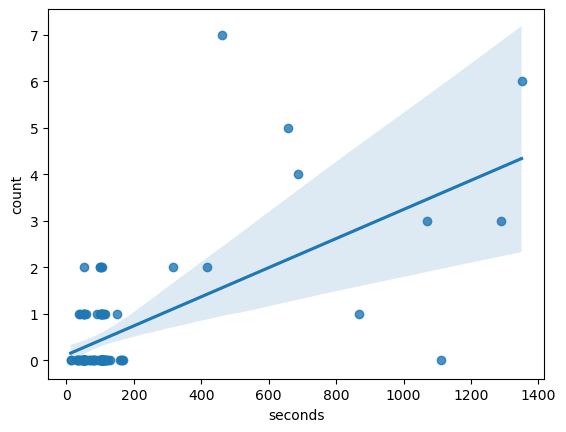

In [4]:

import seaborn as sns
from matplotlib import pyplot as plt

sns.regplot(x='seconds', y='count', data = gamma_ray)
plt.show() 
X = list(gamma_ray['seconds'].values)
y = list(gamma_ray['count'].values)


In [5]:
features = api.add_constant(gamma_ray.seconds)
model = api.OLS(y, features).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     65.03
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           1.85e-12
Time:                        19:46:41   Log-Likelihood:                -137.97
No. Observations:                 100   AIC:                             279.9
Df Residuals:                      98   BIC:                             285.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1182      0.115      1.031      0.305      -0.109       0.346
seconds        0.0031      0.000      8.064      0.000       0.002       0.004
==============================================================================
Omnibus:                       63.558   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              537.233
Skew:                           1.809   Prob(JB):                    2.19e-117
Kurtosis:                      13.763   Cond. No.                         349.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
res = model.resid
standard_dev = np.std(res)
standard_dev

0.9614835988438862

In [18]:
# MLE function
# ml modeling and neg LL calculation
def MLE_Norm(parameters):
    # extract parameters
    const, beta, std_dev = parameters
    # predict the output
    pred = float(const) + float(beta)*np.array(X)
    # Calculate the log-likelihood for normal distribution
    LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
    # Calculate the negative log-likelihood
    neg_LL = -1*LL
    return neg_LL 
# minimize arguments: function, intial_guess_of_parameters, method
mle_model = minimize(MLE_Norm, np.array([2.0,2.0,2.0]), method='l-bfgs-b')
mle_model


      fun: 137.9660761420986
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.32534001e-04,  4.49330173e-01, -2.12025951e-03])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 268
      nit: 34
     njev: 67
   status: 0
  success: True
        x: array([0.11818289, 0.00312899, 0.96147378])

In [19]:
stats.ttest_ind(X,y)

Ttest_indResult(statistic=6.223481344506874, pvalue=2.8454119280344676e-09)

In [24]:
0.2*0.7/1.2

0.11666666666666665

In [38]:
X = pd.read_csv('data/syn_X.csv', header=None)
y = pd.read_csv('data/syn_y.csv', header=None)
X.shape, y.shape, X.head(5)

((100, 2),
 (100, 1),
          0        1
 0  0.53767  0.84038
 1  1.83390 -0.88803
 2 -2.25880  0.10009
 3  0.86217 -0.54453
 4  0.31877  0.30352)

In [40]:
def add_intercept(X):
  return np.concatenate((np.ones_like(X[:,1]), X), axis=1)

# X[0]
X = np.column_stack((X[0],X[1],np.ones(X.shape[0])))
X.shape

(100, 3)

In [56]:
XT = np.transpose(X)
XTX = np.dot(X,XT)
XTX_1= np.linalg.inv(XTX)
r = np.dot(XTX_1,y)
r = np.matmul(XT,r)
r


array([[-129.81744517],
       [-387.79844043],
       [-228.        ]])

In [61]:
X = pd.read_csv('data_and_materials/syn_X.csv', header=None)
y = pd.read_csv('data_and_materials/syn_y.csv', header=None)
x = api.add_constant(X)
result = api.OLS(y, x).fit()
result.summary()
# slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     4469.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           3.13e-96
Time:                        23:10:12   Log-Likelihood:                -70.878
No. Observations:                 100   AIC:                             147.8
Df Residuals:                      97   BIC:                             155.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9296      0.050     38.320      0.000       1.830       2.030
0              1.2640      0.043     29.206      0.000       1.178       1.350
1             -4.5980      0.050    -91.863      0.000      -4.697      -4.499
==============================================================================
Omnibus:                        0.557   Durbin-Watson:                   2.298
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.538
Skew:                          -0.172   Prob(JB):                        0.764
Kurtosis:                       2.895   Cond. No.                         1.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
from sklearn.linear_model import SGDClassifier
data = pd.read_csv('data/mortality.csv')
X = list(data[['JanTemp', 'JulyTemp', 'RelHum', 'Rain', 'Educ', 'Dens', 'NonWhite', 'WhiteCollar', 'Pop', 'House', 'Income', 'HC', 'NOx', 'SO2']].values)
Y = data[['Mortality']].values 
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X,Y[:,0])
# clf.coef_, clf.intercept_


ValueError: Unknown label type: (array([ 790.73,  823.76,  839.71,  844.05,  857.62,  860.1 ,  861.26,
        861.44,  871.34,  871.77,  874.28,  887.47,  893.99,  895.7 ,
        899.26,  899.53,  904.16,  911.7 ,  911.82,  912.2 ,  912.35,
        919.73,  921.87,  923.23,  929.15,  934.7 ,  936.23,  938.5 ,
        941.18,  946.19,  950.67,  952.53,  953.56,  954.44,  958.84,
        959.22,  961.01,  962.35,  967.8 ,  968.67,  970.47,  971.12,
        972.46,  982.29,  985.95,  989.26,  991.29,  994.65,  997.87,
       1001.9 , 1003.5 , 1006.49, 1015.02, 1017.61, 1024.89, 1025.5 ,
       1030.38, 1071.29, 1113.16]),)